# A first look at artificial neural networks

## Artificial Neural Networks

Artificial Neural Networks (ANNs) are computational processing systems that are heavily inspired by the way biological nervous systems function. The basic structure of an ANN can be visually conceptualised like:

<a title="Glosser.ca, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Colored_neural_network.svg"><img width="256" alt="Colored neural network" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/256px-Colored_neural_network.svg.png"></a>

**Figure 1:** A simple three layered fully connected feedforward neural network (FNN), aka Multi-layer perceptrons (MLPs),comprisedof a input layer, a hidden layer and an output layer.



## Neural network modelling frameworks

#### Tensorflow and Keras 
Keras (https://keras.io) is a highlevel and easy-to-use API built on top of Tensorflow (https://www.tensorflow.org) for developing and evaluating deep learning models. It was developed with a focus on enabling fast experimentation. 

In this worksheet, you will learn how to create a neural network using Tensorflow Keras API. 

Neural network models are trained by gradient descent. As we perform computations, Tensorflow memorises the computation graph that we build up. When it comes to compute the gradient, tensorflow can trace back over the computation graph (using the backpropagation algorithm) and work out all the required gradients (handled in TensorFlow via the [GradientTape](https://www.tensorflow.org/api_docs/python/tf/GradientTape) object). 

When we build models with Keras, we don't usually have to worry about low level computation. High-level deep learning concepts translate to Keras APIs:

- **Layers**, which are combined into a model A loss function, which defines the feedback signal used for learning
- An **optimizer**, which determines how learning proceeds Metrics to evaluate model performance, such as accuracy
- A training loop that performs **mini-batch** stochastic gradient descent

Colab has got Tensorflow installed already. It is recommended to run this notebooke using Colab (https://colab.research.google.com/), or on your own computer after proper libraries including Tensorflow has been installed. In case you use Anaconda or miniconda and haven't got installed Tensorflow yet, you can do it following the instruction here:
https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/

If you are not sure if you have got a suitable GPU, you can start with installing Tensorflow for CPU only.

If you have trouble installing Tensorflow in your computer, or your computer does not have sufficient computational power, it would be easier to switch to Colab, or Kaggle kernel, or use some virtual machine in the cloud, where better computational resources (for RAM, CPU, GPU) are available. 

In [45]:
!pip install tensorflow

In [46]:
# Import tensorflow, check version
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.11.0


### Tensor
In general, all current machine-learning systems use tensors as their basic data structure — usually for numerical data. 

Tensors are a generalization of matrices to an arbitrary number of dimensions (note that a dimension is often called an axis in a tensor). NumPy arrays can be called tensors.

* Scalar (rank-0 tensor).
* Vectors (rank-1 tensor).
* Matrices: rank-2 tensors.
* Rank-3 tensors and higher-rank tensors (e.g. array x below are Rank-3 tensors)

In [47]:
import numpy as np
x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])
print(x.ndim)
print(x.shape)

3
(3, 3, 5)


In [48]:
# Constant tensors (Not assignable!!)
# All ones/zero tensors
x = tf.ones(shape=(2, 1))
print(x)
x = tf.zeros(shape=(2, 1))
print(x)

# Random tensors
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.) 
print(x)

x = tf.random.uniform(shape=(3, 1), minval=-1., maxval=1.) 
print(x)

x = 0 # Scalar
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[ 0.84370613]
 [-0.21991567]
 [ 1.3297359 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[ 0.746752  ]
 [-0.4126613 ]
 [ 0.20356321]], shape=(3, 1), dtype=float32)
0


In [49]:
# Unlike numpy array, tensor constant is not assignable.
# see e.g. error raised when trying to assign a value to tensor constant
# import numpy as np
# x = np.ones(shape=(2, 2))
# x[0, 0] = 0.

# x = tf.ones(shape=(2,2))
# x[0, 0] = 0.

In [50]:
# To modify tensors, tensor Variabble is used in tensorflow
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

# Assign values to a tensor variable
v.assign(tf.ones((3, 1)))
print(v)

# Modify element with index [0,0] in tensor variable v to 0
# Your code here
v[0,0].assign(0)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.96668  ],
       [ 1.8396829],
       [-0.8878814]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.],
       [1.],
       [1.]], dtype=float32)>


## MNIST

 The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. The MNIST data-set is about 12 MB and will be downloaded automatically if it is not located in the given path.

In [51]:
from tensorflow.keras.datasets import mnist

(image_train, label_train), (image_test, label_test) = mnist.load_data()

print("Size of:")
print("- Training-set:\t\t{}".format(image_train.shape))
print("- Test-set:\t\t{}".format(image_test.shape))

Size of:
- Training-set:		(60000, 28, 28)
- Test-set:		(10000, 28, 28)


In [52]:
# Your code: 
# print label_train, print its shape
print("Label_train: %s\nshape: %s"%(label_train, label_train.shape))

Label_train: [5 0 4 ... 5 6 8]
shape: (60000,)


The data-set is split into 3 mutually exclusive sub-sets. We will only use the training and test-sets in this tutorial.

Define a simple function to have a look at the images.

## Getting to know our data

The following method is plots 9 images from the dataset in a 3x3 grid.

In [53]:
import matplotlib.pyplot as plt

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        #ax.imshow(images[i].reshape(img_shape), cmap='binary')
        ax.imshow(images[i], cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Plot a few images to see if data is correct

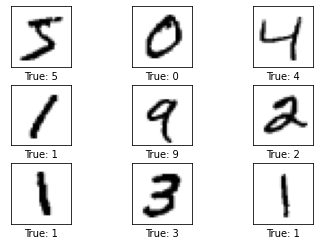

In [54]:
plot_images(image_train[0:9], label_train[0:9])

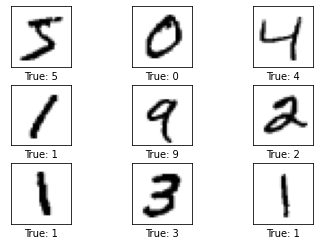

In [55]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length. (might want to use this later for input_size...)
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

# Get the first images from the test-set.
images = image_train[0:9]

# Get the true classes for those images.
cls_true = label_train[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

For this first network, we'll flatten everything into a 784-dimensional feature vector.

In [56]:
# In general, you may select between any two indices along each tensor axis. 
# For instance, in order to select 14 × 14 pixels in the bottom-right corner for image with index 10, you do this:
my_slice = image_train[10, 14:, 14:]
print(my_slice.shape)
my_slice

(14, 14)


array([[254, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [ 89,  93, 240, 254, 171,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   1, 128, 254, 219,  31,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   7, 254, 254, 214,  28,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0, 138, 254, 254, 116,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [ 25, 240, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [206, 254, 254, 139,   8,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [254, 253, 213,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [254, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [239,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0, 

The images we get were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [57]:
# Prepare data, flatten the input and rescale
X_train = image_train.reshape((60000, 28*28)) # or #X_train = image_train.reshape(X_train.shape[0], -1)
X_train = X_train.astype('float32')/255 
X_test = image_test.reshape((10000, 28*28)) # or #X_test = image_test.reshape(X_test.shape[0], -1)
X_test = X_test.astype('float32')/255

print("Size of:")
print("- Training-set:\t\t{}".format(X_train.shape))
print("- Test-set:\t\t{}".format(X_test.shape))

Size of:
- Training-set:		(60000, 784)
- Test-set:		(10000, 784)


#### To build a fully connected feedforward network (aka Multilayer Perceptron (MLP))
The first model we'll use is a simple fully connected feedforward network. This is called a Dense layer in Keras. -
#### Dimensionality reduction with PCA
Since fully connected layers are a bit heavy on image data (and you're probably running this on your laptop), we'll reduce the dimensionality of the data by [PCA (principal component analysis)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). PCA decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. We will discuss topic on dimensionalilty reduction in a few weeks. 

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=60) # reduce to 60 dimensions
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape) 
print(X_test.shape) # NB: none of this is Keras yet. We're just using sklearn on some numpy arrays

(60000, 60)
(10000, 60)


The training labels are encoded as integers. We need these as one-hot vectors instead, so we can match them to the ten outputs of the neural network.

In [59]:
from keras.utils import to_categorical

print(label_train.shape, label_test.shape)

y_train = to_categorical(label_train)
y_test = to_categorical(label_test)

print(y_train.shape, y_test.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


### Question: 
Look at the one-hot coding given by y_train[0], which digit does it represent?

In [60]:
print(y_train[0]) # print the one-hot vector for the first example
print(label_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [61]:
print(X_train[0].shape)

(60,)


## Keras Model

The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the ```Sequential``` model, a linear stack of **layers**. Before we start take some time to read the ```Sequential``` documentation:

https://keras.io/getting-started/sequential-model-guide/

Note: Keras has two APIs for this: the **Sequential** API and the **Model** API. The sequential API (the simplest) assumes that your model is a simple sequence of operations, usually neural network layers. The input is passed through the first layer, the result of that is passed through the second and so on. 

This is useful for simple NN models where you are only interested in the input and output. If your model gets more complex, you may want to use the Model API (we'll use in the next practicals).

Now, creating a Sequential model. 

We can create a Sequential model incrementally via the add() method.

In [62]:
from keras.models import Sequential
from keras import layers

model = Sequential() # or specify model name: model = Sequential(name="my_first_model")
model.add(keras.Input(60)) # Input layer, input shape setup here should match with the input data when fitting or making prediction.
model.add(layers.Dense(32, activation='relu'))#, input_shape=(60,))) # first dense layer, 32 hidden units,
model.add(layers.Dense(10, activation='softmax'))# second dense layer, output class probabilities with softmax activation
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                1952      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 2,282
Trainable params: 2,282
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Check model weights
model.weights

[<tf.Variable 'dense_10/kernel:0' shape=(60, 32) dtype=float32, numpy=
 array([[-0.22239353,  0.20137358,  0.02500767, ...,  0.15567666,
          0.03322047,  0.00501001],
        [ 0.10211974,  0.25137767,  0.05001003, ..., -0.20213716,
         -0.09187753,  0.08515877],
        [-0.02803366,  0.16142759, -0.02694915, ...,  0.06983647,
          0.23461318, -0.15295222],
        ...,
        [ 0.13117027, -0.01808478, -0.18971738, ...,  0.1206131 ,
         -0.21601918, -0.13230169],
        [-0.21827638,  0.11012149, -0.01431687, ..., -0.1781094 ,
          0.01536688,  0.15383866],
        [-0.16708308,  0.03300613, -0.17272624, ..., -0.25232258,
          0.03080174,  0.0045276 ]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(32,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_11/kernel:0' shape=(32, 10) dt

You can also create a Sequential model by passing a list of layers to the Sequential constructor:

In [64]:
model = Sequential(    
    [
     keras.Input(shape=(60)),   
     layers.Dense(32, activation='relu'),
     layers.Dense(10, activation='softmax')
    ]
)

model.summary()

# Get the list of layers in the model
model.layers

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                1952      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 2,282
Trainable params: 2,282
Non-trainable params: 0
_________________________________________________________________


**Question**: 
1. how many hidden layers does this model have?
- 1 hidden, 1 output
2. how to compute the total number of parameters or weights? 
- model.summary()
(Remeber to add the parameters for bias)


Once create the model, you can start training and validating the model. https://keras.io/guides/training_with_built_in_methods/

In [65]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)
#optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Training

We've also told the compiler that we'd like it to compute accuracy for us during training (since categorical cross-entropy loss is a bit hard to interpret).

We're now ready to start training using the fit() method:
- The **batch size** to use within each epoch of mini-batch gradient descent: the number of training examples considered to compute the gradients for one weight update step.
- The number of **epochs** to train for: how many times the training loop should iterate over the data passed. 

In [66]:
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X_train, y_train, epochs=5, batch_size=1000);

Epoch 1/5
60/60 [==============================] - 0s 2ms/step - loss: 2.2960 - accuracy: 0.1784
Epoch 2/5
60/60 [==============================] - 0s 2ms/step - loss: 1.8806 - accuracy: 0.3665
Epoch 3/5
60/60 [==============================] - 0s 3ms/step - loss: 1.6109 - accuracy: 0.5042
Epoch 4/5
60/60 [==============================] - 0s 3ms/step - loss: 1.4165 - accuracy: 0.5880
Epoch 5/5
60/60 [==============================] - 0s 3ms/step - loss: 1.2647 - accuracy: 0.6456


## Validating##
A deep learning model should never be evaluated on its training data alone - it’s standard practice to use a validation set to monitor the accuracy (or other performance metric) of the model during training. Here, we randomly set apart 10% of training samples from the original training data for validation using validation_split argument in fit() method. Usually, we create a validation set separately, and set "validation_data" in fit(). For more details on keras model training api, check https://keras.io/api/models/model_training_apis/

The call to fit() returns a **History** object. This object contains a history field, which is a dict mapping keys such as "loss" or specific metric names to the list of their per-epoch values.

In [67]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=1000);

Epoch 1/5
54/54 [==============================] - 0s 6ms/step - loss: 1.1539 - accuracy: 0.6849 - val_loss: 1.0299 - val_accuracy: 0.7412
Epoch 2/5
54/54 [==============================] - 0s 2ms/step - loss: 1.0609 - accuracy: 0.7180 - val_loss: 0.9408 - val_accuracy: 0.7723
Epoch 3/5
54/54 [==============================] - 0s 2ms/step - loss: 0.9819 - accuracy: 0.7434 - val_loss: 0.8653 - val_accuracy: 0.7947
Epoch 4/5
54/54 [==============================] - 0s 3ms/step - loss: 0.9148 - accuracy: 0.7636 - val_loss: 0.8015 - val_accuracy: 0.8112
Epoch 5/5
54/54 [==============================] - 0s 3ms/step - loss: 0.8576 - accuracy: 0.7788 - val_loss: 0.7475 - val_accuracy: 0.8243


In [68]:
# Consider increase the number of epochs if the model loss or traininng performance is not good enough or not converged
# 
history = model.fit(X_train, y_train, validation_split=0.1, epochs=8, batch_size=1000)

Epoch 1/8
54/54 [==============================] - 0s 2ms/step - loss: 0.8089 - accuracy: 0.7901 - val_loss: 0.7015 - val_accuracy: 0.8338
Epoch 2/8
54/54 [==============================] - 0s 4ms/step - loss: 0.7670 - accuracy: 0.7991 - val_loss: 0.6621 - val_accuracy: 0.8392
Epoch 3/8
54/54 [==============================] - 0s 2ms/step - loss: 0.7309 - accuracy: 0.8070 - val_loss: 0.6282 - val_accuracy: 0.8473
Epoch 4/8
54/54 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.8147 - val_loss: 0.5988 - val_accuracy: 0.8545
Epoch 5/8
54/54 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.8210 - val_loss: 0.5730 - val_accuracy: 0.8603
Epoch 6/8
54/54 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.8264 - val_loss: 0.5504 - val_accuracy: 0.8652
Epoch 7/8
54/54 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.8309 - val_loss: 0.5303 - val_accuracy: 0.8668
Epoch 8/8
54/54 [==========

In [69]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [70]:
history.history

{'loss': [0.8088750243186951,
  0.7670384645462036,
  0.7309027314186096,
  0.6994727849960327,
  0.6719745993614197,
  0.6477213501930237,
  0.6261749863624573,
  0.6068903207778931],
 'accuracy': [0.7901111245155334,
  0.7991296052932739,
  0.8069815039634705,
  0.8147037029266357,
  0.8209629654884338,
  0.8264074325561523,
  0.8308888673782349,
  0.8351296186447144],
 'val_loss': [0.7015026211738586,
  0.6621392369270325,
  0.6282249093055725,
  0.5987614393234253,
  0.5730320811271667,
  0.5503917336463928,
  0.5303110480308533,
  0.5124158263206482],
 'val_accuracy': [0.8338333368301392,
  0.8391666412353516,
  0.8473333120346069,
  0.8544999957084656,
  0.8603333234786987,
  0.8651666641235352,
  0.8668333292007446,
  0.8688333630561829]}

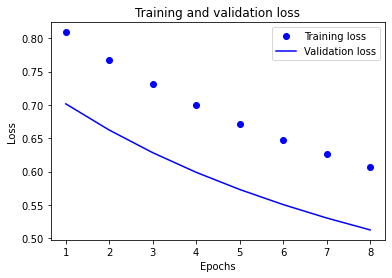

In [71]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

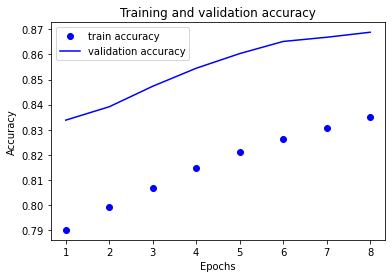

In [72]:
# Plotting the training and validation accuracy
# Your code here:
hist = history.history
train_accuracy = hist['accuracy']
val_accuracy = hist['val_accuracy']
epochs = range(1, len(val_accuracy)+1)
plt.plot(epochs, train_accuracy, 'bo', label='train accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [73]:
# After the model training is complete
# evaluate the model 
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.8527
test loss, test acc: [0.5594953894615173, 0.8526999950408936]
313/313 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.8527
Accuracy: 85.27


##Inference##
To make predictions using a trained model 

In [74]:
# To make predictions and get the confusion matrix
# model.predict will generate probability for all 10 digits, 
#    so we use argmax to pick the class with the highest probability
from sklearn import metrics
y_pred = model.predict(X_test)
print(y_pred[0]) # print the prediction for first image

print('\nConfusion matrix: ')
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

print('\nClassification report: ')
print(metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

313/313 [==============================] - 0s 669us/step
[4.8914924e-04 2.1802855e-04 2.3976783e-04 3.6582884e-03 7.9814036e-04
 3.7179487e-03 8.8896617e-05 9.7924596e-01 1.3872134e-04 1.1405151e-02]

Confusion matrix: 
[[ 930    0    2    8    1   14   16    5    3    1]
 [   0 1096    6    2    3    1    4    1   22    0]
 [  26   37  832   15   30    6   17   26   40    3]
 [   6   11   30  838    1   25   13   26   47   13]
 [   0    9    3    0  832    2   40    8   11   77]
 [  25   26   11   49    7  663   34   26   36   15]
 [  17    7   12    2   35   13  857    3   10    2]
 [   3   28   29    5    9    1    1  894    6   52]
 [  19   28   16   51   13   20   11   15  771   30]
 [  12    8    8   10   81   12    5   42   17  814]]

Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       980
           1       0.88      0.97      0.92      1135
           2       0.88      0.81      0.84      1032
       

### Tasks

As you now have a model to play with (in no particular order):

1. Change the `learning-rate` for the optimiser.
2. Change the ```batch_size``` to e.g. 1 or 1000 (and see how learning rate deals with larger/smaller batch sizes).
3. Change the optimiser: from SGD to Adam
4. Add complexity to the model, being mindful of how "powerful" your computers are.

7. Try and find a sweet-spot between the size and performance of the model, take into account things like the number of iterations/epochs required to train the model in these assumptions.

6. Do you get the exact same results if you run the Notebook multiple times without changing any parameters? Why or why not?

5. Do you think these changes will have the same effect (if any) on other classifiers?

8. Investigate **effect of dimensionality reduction** (with PCA, e.g. you may try to build the model without PCA and compare ...)

9. Try out some **other ML classifiers** that have been discussed in the class, e.g. kNN (with scikit-learn) 

In [75]:
# Your code
#
#
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers

#create sequential model
model2 = Sequential(    
    [
         keras.Input(shape=(60)),   
         layers.Dense(10, activation='relu'),
         layers.Dense(10, activation='relu'),
         layers.Dense(10, activation='relu'),
         layers.Dense(10, activation='softmax'),
    ]
)

model2.summary()

# Get the list of layers in the model
model2.layers

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                610       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 940
Trainable params: 940
Non-trainable params: 0
_________________________________________________________________


In [76]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
history2 = model2.fit(X_train, y_train, validation_split=0.1, epochs=15, batch_size=1000)

Epoch 1/15
54/54 [==============================] - 1s 4ms/step - loss: 2.1775 - accuracy: 0.1960 - val_loss: 2.0286 - val_accuracy: 0.2572
Epoch 2/15
54/54 [==============================] - 0s 2ms/step - loss: 1.8762 - accuracy: 0.2979 - val_loss: 1.7044 - val_accuracy: 0.3730
Epoch 3/15
54/54 [==============================] - 0s 2ms/step - loss: 1.5628 - accuracy: 0.4464 - val_loss: 1.3523 - val_accuracy: 0.5508
Epoch 4/15
54/54 [==============================] - 0s 2ms/step - loss: 1.2484 - accuracy: 0.5826 - val_loss: 1.0408 - val_accuracy: 0.6538
Epoch 5/15
54/54 [==============================] - 0s 4ms/step - loss: 0.9975 - accuracy: 0.6714 - val_loss: 0.8333 - val_accuracy: 0.7313
Epoch 6/15
54/54 [==============================] - 0s 3ms/step - loss: 0.8337 - accuracy: 0.7298 - val_loss: 0.6998 - val_accuracy: 0.7803
Epoch 7/15
54/54 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.7636 - val_loss: 0.6102 - val_accuracy: 0.8063
Epoch 8/15
54/54 [==

In [78]:
history2.history

{'loss': [2.1774544715881348,
  1.8761857748031616,
  1.562775731086731,
  1.2484301328659058,
  0.9975413084030151,
  0.833742618560791,
  0.7210901379585266,
  0.6386058330535889,
  0.5712273716926575,
  0.5123770833015442,
  0.4609481394290924,
  0.42170485854148865,
  0.39264413714408875,
  0.37171295285224915,
  0.356122761964798],
 'accuracy': [0.19596296548843384,
  0.2978888750076294,
  0.44637036323547363,
  0.5825555324554443,
  0.6713703870773315,
  0.7298148274421692,
  0.7635555267333984,
  0.7896296381950378,
  0.8185555338859558,
  0.8440370559692383,
  0.8618888854980469,
  0.8731296062469482,
  0.8829073905944824,
  0.8888888955116272,
  0.894777774810791],
 'val_loss': [2.0285892486572266,
  1.7043688297271729,
  1.3523385524749756,
  1.0407589673995972,
  0.833284854888916,
  0.6997577548027039,
  0.6101773381233215,
  0.5397523641586304,
  0.4807480573654175,
  0.4265469014644623,
  0.38242992758750916,
  0.34867537021636963,
  0.3270862102508545,
  0.30983692407608

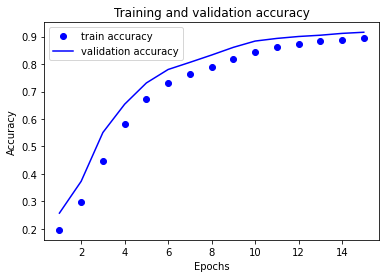

In [79]:
hist = history2.history
train_accuracy = hist['accuracy']
val_accuracy = hist['val_accuracy']
epochs = range(1, len(val_accuracy)+1)
plt.plot(epochs, train_accuracy, 'bo', label='train accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [80]:
#evaluation of model
results2 = model2.evaluate(X_test, y_test)
print("test loss, test acc:", results2)

_, accuracy2 = model2.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy2*100))

313/313 [==============================] - 0s 976us/step - loss: 0.3289 - accuracy: 0.9003
test loss, test acc: [0.3288639783859253, 0.9003000259399414]
313/313 [==============================] - 0s 801us/step - loss: 0.3289 - accuracy: 0.9003
Accuracy: 90.03


In [81]:
#without PCA 
X_train_noPCA = image_train.reshape((60000, 28*28)) # or #X_train = image_train.reshape(X_train.shape[0], -1)
X_train_noPCA = X_train.astype('float32')/255 
X_test_noPCA = image_test.reshape((10000, 28*28)) # or #X_test = image_test.reshape(X_test.shape[0], -1)
X_test_noPCA = X_test.astype('float32')/255

print("Size of:")
print("- Training-set:\t\t{}".format(X_train_noPCA.shape))
print("- Test-set:\t\t{}".format(X_test_noPCA.shape))

Size of:
- Training-set:		(60000, 60)
- Test-set:		(10000, 60)


In [82]:
model_noPCA = Sequential([
     keras.Input(shape=(60)),   
     layers.Dense(32, activation='relu'),
     layers.Dense(10, activation='softmax')
])

In [83]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_noPCA.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history_noPCA = model_noPCA.fit(X_train_noPCA, y_train,validation_split=0.1, epochs=100, batch_size=5000 )

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 2.3000 - accuracy: 0.1797 - val_loss: 2.2984 - val_accuracy: 0.1303
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 2.2979 - accuracy: 0.1215 - val_loss: 2.2970 - val_accuracy: 0.1055
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 2.2964 - accuracy: 0.1133 - val_loss: 2.2955 - val_accuracy: 0.1050
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 2.2949 - accuracy: 0.1132 - val_loss: 2.2941 - val_accuracy: 0.1050
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 2.2934 - accuracy: 0.1132 - val_loss: 2.2925 - val_accuracy: 0.1050
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 2.2918 - accuracy: 0.1132 - val_loss: 2.2910 - val_accuracy: 0.1050
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 2.2901 - accuracy: 0.1132 - val_loss: 2.2893 - val_accuracy: 0.1050
Epoch 8/100

Epoch 59/100
11/11 [==============================] - 0s 5ms/step - loss: 1.9643 - accuracy: 0.7429 - val_loss: 1.9492 - val_accuracy: 0.7775
Epoch 60/100
11/11 [==============================] - 0s 5ms/step - loss: 1.9536 - accuracy: 0.7562 - val_loss: 1.9377 - val_accuracy: 0.7945
Epoch 61/100
11/11 [==============================] - 0s 5ms/step - loss: 1.9427 - accuracy: 0.7511 - val_loss: 1.9268 - val_accuracy: 0.7845
Epoch 62/100
11/11 [==============================] - 0s 5ms/step - loss: 1.9319 - accuracy: 0.7516 - val_loss: 1.9153 - val_accuracy: 0.7978
Epoch 63/100
11/11 [==============================] - 0s 5ms/step - loss: 1.9210 - accuracy: 0.7620 - val_loss: 1.9040 - val_accuracy: 0.8015
Epoch 64/100
11/11 [==============================] - 0s 5ms/step - loss: 1.9099 - accuracy: 0.7651 - val_loss: 1.8926 - val_accuracy: 0.7982
Epoch 65/100
11/11 [==============================] - 0s 5ms/step - loss: 1.8988 - accuracy: 0.7645 - val_loss: 1.8810 - val_accuracy: 0.8058
Epoch 

In [84]:
history_noPCA.history

{'loss': [2.300001382827759,
  2.297908306121826,
  2.296386241912842,
  2.2948851585388184,
  2.2933523654937744,
  2.2917613983154297,
  2.290086269378662,
  2.2883365154266357,
  2.2864718437194824,
  2.284482955932617,
  2.2823753356933594,
  2.280111789703369,
  2.2777137756347656,
  2.27514910697937,
  2.2724294662475586,
  2.2695369720458984,
  2.266465663909912,
  2.2632415294647217,
  2.2598345279693604,
  2.2562174797058105,
  2.252336025238037,
  2.248220443725586,
  2.2439229488372803,
  2.239436388015747,
  2.234750986099243,
  2.229813814163208,
  2.2247540950775146,
  2.2194113731384277,
  2.213942766189575,
  2.208233594894409,
  2.202374219894409,
  2.196260929107666,
  2.190002202987671,
  2.1835408210754395,
  2.1768314838409424,
  2.1700193881988525,
  2.162982940673828,
  2.1557652950286865,
  2.148427724838257,
  2.140786647796631,
  2.133042335510254,
  2.1251344680786133,
  2.1171085834503174,
  2.1088383197784424,
  2.1003577709198,
  2.0915591716766357,
  2.08

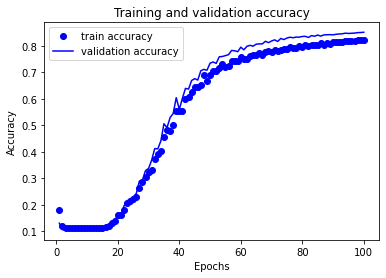

In [85]:
hist = history_noPCA.history
train_accuracy = hist['accuracy']
val_accuracy = hist['val_accuracy']
epochs = range(1, len(val_accuracy)+1)
plt.plot(epochs, train_accuracy, 'bo', label='train accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [86]:
#evaluation of model
results_noPCA = model_noPCA.evaluate(X_test_noPCA, y_test)
print("test loss, test acc:", results_noPCA)
                                                             
_, accuracy_noPCA = model2.evaluate(X_test_noPCA, y_test)
print('Accuracy: %.2f' % (accuracy_noPCA*100))

313/313 [==============================] - 0s 918us/step - loss: 1.4605 - accuracy: 0.8363
test loss, test acc: [1.4604612588882446, 0.8363000154495239]
313/313 [==============================] - 0s 854us/step - loss: 3.2510 - accuracy: 0.1010
Accuracy: 10.10


In [92]:
from sklearn.neighbors import KNeighborsClassifier
kmod = KNeighborsClassifier(n_neighbors=3).fit(X_train, label_train)
score = kmod.score(X_test, label_test)
print("Accuracy of knn with k=1: %.2f"%(score))

Accuracy of knn with k=1: 0.98
